In [4]:
##  import 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
salary =pd.read_csv('D:/Lecture file/20th lec/Project - 1&2_ Simple_Reg/salary_Data.csv')
salary.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [8]:
## data cleaning process before modeling
salary.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [10]:
salary.shape

(30, 2)

In [12]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

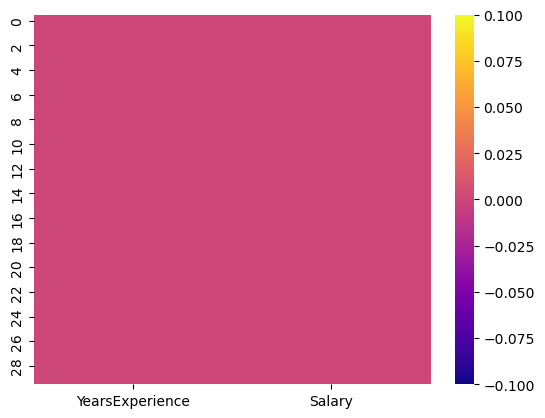

In [93]:
### exploratory data analysis on salary data 
sns.heatmap(salary.isnull(),cmap = 'plasma')
plt.savefig('D:/heatmap.png')

In [16]:
cols =salary.columns
cols


Index(['YearsExperience', 'Salary'], dtype='object')

Col Name -  YearsExperience


count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64
Col Name -  Salary


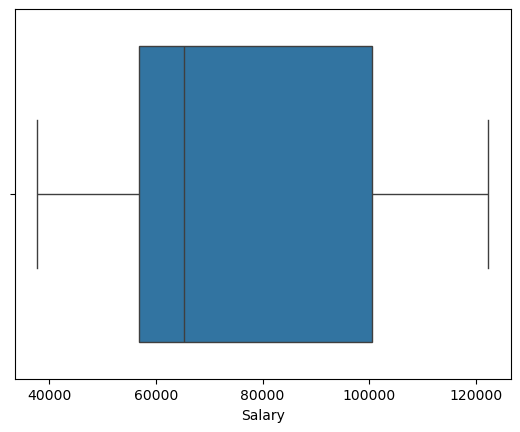

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


In [91]:
##### Outliers - 
for i in cols:
    print("Col Name - ",i)
    sns.boxplot(x = salary[i])
    plt.savefig('D:/boxplot.png')
    plt.show()  ###### To seperate all the plots
    print(salary[i].describe())
    print("================================================================")

In [23]:
## Modeling for salry data
salary.shape

(30, 2)

In [25]:
## assigning column value to variable X and y
X =salary['YearsExperience']
X =X.values.reshape(-1 ,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [27]:
y =salary['Salary']
y =y.values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

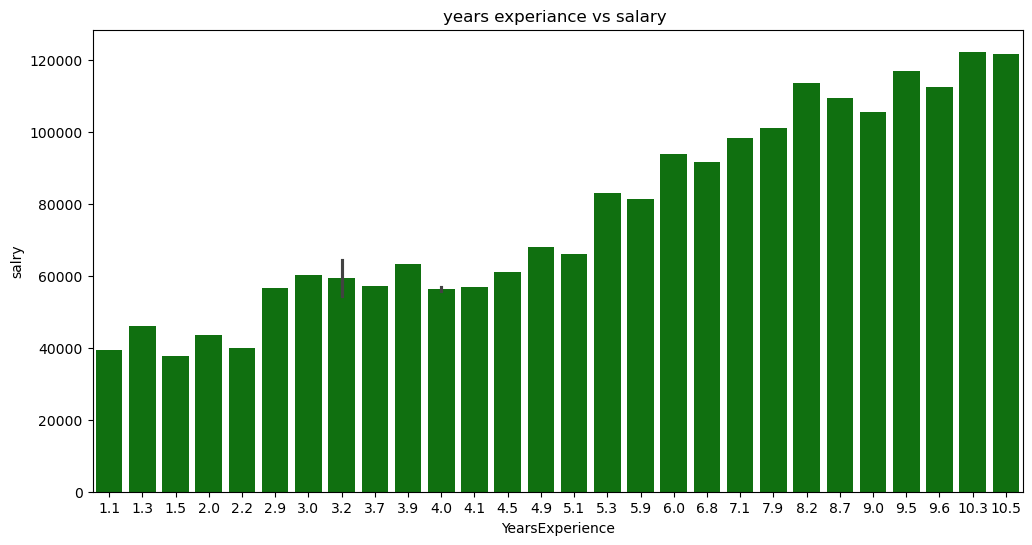

In [82]:
X =salary['YearsExperience']
y =salary['Salary']
plt.figure(figsize=(12, 6))
sns.barplot(x=X, y=y, color='green')
plt.title("years experiance vs salary ")
plt.xlabel("YearsExperience")
plt.ylabel("salry")

plt.savefig('D:/barplot.png')
plt.show()

In [29]:
### model LinearRegression
from sklearn.linear_model import LinearRegression
salary_model =LinearRegression() ## object

In [31]:
## training 
salary_model_train =salary_model.fit(X,y)
print( 'Delivery model Training completed')

Delivery model Training completed


In [33]:
## Rules
slope =salary_model_train.coef_
print(f' the slope value is :{slope}')

 the slope value is :[[9449.96232146]]


In [35]:
constant = salary_model_train.intercept_
print(f'constant values is :{constant.round(3)}')

constant values is :[25792.2]


In [37]:
## accuracy of the model
r_square =salary_model_train.score(X,y)
print(f'The r_square value is :{r_square}')

The r_square value is :0.9569566641435086


In [39]:
##prediction
y = slope*X + constant
y.round(3)

array([[ 36187.159],
       [ 38077.151],
       [ 39967.144],
       [ 44692.125],
       [ 46582.117],
       [ 53197.091],
       [ 54142.087],
       [ 56032.08 ],
       [ 56032.08 ],
       [ 60757.061],
       [ 62647.053],
       [ 63592.049],
       [ 63592.049],
       [ 64537.046],
       [ 68317.031],
       [ 72097.016],
       [ 73987.008],
       [ 75877.001],
       [ 81546.978],
       [ 82491.974],
       [ 90051.944],
       [ 92886.933],
       [100446.903],
       [103281.891],
       [108006.872],
       [110841.861],
       [115566.842],
       [116511.838],
       [123126.812],
       [125016.805]])

In [41]:
 ## sampling method
salary.shape


(30, 2)

In [43]:
##importing 
#sampling done by using sickit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [45]:
salary_training, salary_testing = train_test_split(salary,test_size=0.2) 

In [47]:
salary_training.shape,salary_testing.shape

((24, 2), (6, 2))

In [49]:
##training
X_train =salary_training['YearsExperience'].values.reshape(-1,1)
y_train =salary_training['Salary'].values.reshape(-1,1)

In [51]:
X_test =salary_testing['YearsExperience'].values.reshape(-1,1)
y_test =salary_testing['Salary'].values.reshape(-1,1)

In [53]:
salary_model_lr=LinearRegression()
##fiting for model train
salary_model_lr_train =salary_model_lr.fit(X_train,y_train)
print("Training compleated")

Training compleated


In [55]:
## Accuracy of training
print(f"Accuracy of the Trainig Model is : {salary_model_lr_train.score(X_train,y_train)}")

Accuracy of the Trainig Model is : 0.947371206443492


In [77]:
##evaluation with testing data  - passing the Input

y_pred = salary_model_lr_train.predict(X_test)
print(f"The prediction for salary :\n {y_pred.round(3)}")


The prediction for salary :
 [[121904.449]
 [ 75440.986]
 [ 40128.754]
 [115399.564]
 [ 44775.1  ]
 [102389.794]]


In [59]:
y_test

array([[122391.],
       [ 83088.],
       [ 37731.],
       [112635.],
       [ 43525.],
       [113812.]])

In [61]:
## r_square value
r_square =r2_score(y_test,y_pred)
print(f" salary Data R_square value is :{r_square}")

 salary Data R_square value is :0.9706213325767867


In [63]:
##rmse value
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(f" Salary data RMSE value is : {rmse}")

 Salary data RMSE value is : 5832.882849507408


In [65]:
plt.figure(figsize = (12,6))
plt.plot(y_test, label='y_test', color='blue',marker ='o')
plt.plot(y_pred, label='y_pred', color='red',marker='x')
plt.title("Year experiance vs salary")
plt.legend()
plt.savefig('D:/delivery actual time vs prediction time.png')
plt.show()